<h4>Cat Vs Dog image classification using cnn</h4>

Importing required libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
from os import listdir
import matplotlib.pyplot as plt
from sklearn import metrics
import os

Data Preprocessing

In [7]:
# setting path of training and validation datset
train_dir="train"
val_dir="validation"

# create ImageDataGeneratior for data augmentation
train_dataGen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_dataGen=ImageDataGenerator(rescale=1./255)

# flow data from directories
train_generator=train_dataGen.flow_from_directory(train_dir,
                                                  target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode='binary')
val_generator=train_dataGen.flow_from_directory(val_dir,
                                                  target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode='binary')


Found 20124 images belonging to 2 classes.
Found 4840 images belonging to 2 classes.


Defining the cnn model

In [8]:
model=Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),MaxPooling2D(2,2),
                  Conv2D(64,(3,3),activation='relu'),MaxPooling2D(2,2),
                  Conv2D(128,(3,3),activation='relu'),MaxPooling2D(2,2),
                  Flatten(),
                  Dense(512,activation='relu'),
                  Dropout(0.5),
                  Dense(1,activation='sigmoid')])
model.summary()

C:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

Compile the Model

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Train the model

In [11]:
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,
    epochs=30,
    validation_data=val_generator,
    validation_steps=val_generator.samples//val_generator.batch_size
)

C:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
608/628 ━━━━━━━━━━━━━━━━━━━━ 6s 339ms/step - accuracy: 0.5279 - loss: 0.7235

C:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


628/628 ━━━━━━━━━━━━━━━━━━━━ 236s 374ms/step - accuracy: 0.5287 - loss: 0.7224 - val_accuracy: 0.5985 - val_loss: 0.6618
Epoch 2/30
  1/628 ━━━━━━━━━━━━━━━━━━━━ 2:37 251ms/step - accuracy: 0.5312 - loss: 0.6802

C:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


628/628 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.5312 - loss: 0.6802 - val_accuracy: 0.6058 - val_loss: 0.6608
Epoch 3/30
628/628 ━━━━━━━━━━━━━━━━━━━━ 229s 364ms/step - accuracy: 0.6192 - loss: 0.6540 - val_accuracy: 0.6757 - val_loss: 0.6032
Epoch 4/30
628/628 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.6250 - loss: 0.6520 - val_accuracy: 0.6792 - val_loss: 0.5995
Epoch 5/30
628/628 ━━━━━━━━━━━━━━━━━━━━ 231s 367ms/step - accuracy: 0.6740 - loss: 0.6097 - val_accuracy: 0.7115 - val_loss: 0.5601
Epoch 6/30
628/628 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7812 - loss: 0.5091 - val_accuracy: 0.7132 - val_loss: 0.5603
Epoch 7/30
628/628 ━━━━━━━━━━━━━━━━━━━━ 229s 365ms/step - accuracy: 0.7048 - loss: 0.5749 - val_accuracy: 0.7471 - val_loss: 0.5232
Epoch 8/30
628/628 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7812 - loss: 0.5250 - val_accuracy: 0.7341 - val_loss: 0.5330
Epoch 9/30
628/628 ━━━━━━━━━━━━━━━━━━━━ 236s 376ms/step - accuracy: 0.7161 - loss: 0.5560 - val

Evaluating the model

Text(0.5, 1.0, 'Accuracy')

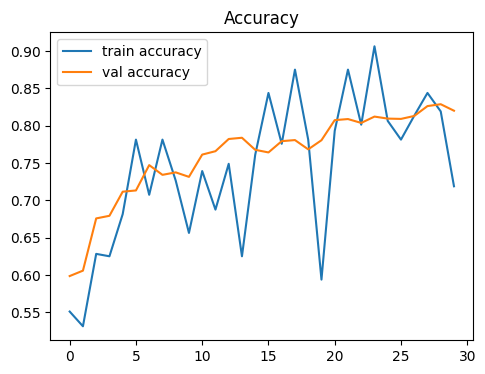

In [12]:
# plotting the accuracy and loss
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.title("Accuracy")




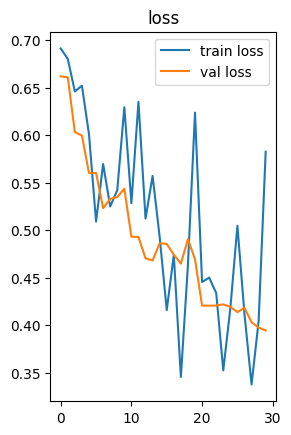

In [13]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.title("loss")
plt.show()

Model Evaluation

In [14]:
val_loss,val_acc=model.evaluate(val_generator)
print("Validation accuracy:",val_acc*100)

152/152 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - accuracy: 0.8189 - loss: 0.3984
Validation accuracy: 82.43801593780518


In [ ]:
# Model